![Banner ETL](../5_Sources/Images/banner_etl.gif)

# <h1 align=center> **ML - KPI DE SENTIMIENTOS** </h1>

In [1]:
pip install nltk

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 3, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 27.5 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install wordcloud

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 4, Finished, Available)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 455.4/455.4 kB 13.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 5, Finished, Available)

[nltk_data] Downloading package vader_lexicon to /home/trusted-
[nltk_data]     service-user/nltk_data...
[nltk_data] Downloading package stopwords to /home/trusted-service-
[nltk_data]     user/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 6, Finished, Available)

In [5]:
df_review_yelp = spark.sql("SELECT hotel_id, review_yelp_text as review FROM DataLakePG.reviews_yelp").toPandas()
df_review_yelp.head(4)

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 7, Finished, Available)

,hotel_id,review
0,1034670523,located in the heart of oldsmar is courtyard b...
1,330989,i had a very pleasant stay here while in town ...
2,16124,it s probably not easy to host a bachelor part...
3,820721,spoiler alert cute cozy \n\nif you re used...


In [6]:
df_review_yelp.info()

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 8, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89185 entries, 0 to 89184
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hotel_id  89185 non-null  int64 
 1   review    89185 non-null  object
dtypes: int64(1), object(1)
memory usage: 1.4+ MB


In [7]:
df_review_gm = spark.sql("SELECT hotel_id, review_gm_text as review FROM DataLakePG.reviews_gm").toPandas()
df_review_gm.head(4)

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 9, Finished, Available)

,hotel_id,review
0,292616,None
1,292616,None
2,292616,None
3,292616,None


In [8]:
df_review_gm.info()

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 10, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58216 entries, 0 to 58215
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hotel_id  58216 non-null  int64 
 1   review    37050 non-null  object
dtypes: int64(1), object(1)
memory usage: 909.8+ KB


In [42]:
df_yelp_gm = pd.concat([df_review_yelp, df_review_gm], axis = 0)
df_yelp_gm.head(4)

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 44, Finished, Available)

,hotel_id,review
0,1034670523,located in the heart of oldsmar is courtyard b...
1,330989,i had a very pleasant stay here while in town ...
2,16124,it s probably not easy to host a bachelor part...
3,820721,spoiler alert cute cozy \n\nif you re used...


In [21]:
df_yelp_gm.info()

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 23, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147401 entries, 0 to 58215
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   hotel_id  147401 non-null  int64 
 1   review    126235 non-null  object
dtypes: int64(1), object(1)
memory usage: 3.4+ MB


In [39]:
df_hotels = spark.sql("SELECT * FROM DataLakePG.hotels").toPandas()
df_hotels= df_hotels.iloc[:,0:2]
df_hotels.head(4)

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 41, Finished, Available)

,hotel_id,name
0,577922,Calabay Parc Homes by Oceanbeds
1,577924,Disney Area Executive Homes by Oceanbeds
2,577925,Disney Area Platinum Homes by Oceanbeds
3,577926,Disney Area Standard Homes by Oceanbeds


In [40]:
df_hotels.info()

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 42, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41627 entries, 0 to 41626
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   hotel_id  41627 non-null  int64 
 1   name      41627 non-null  object
dtypes: int64(1), object(1)
memory usage: 650.5+ KB


In [43]:
df_yelp_gm=pd.merge(df_hotels,df_yelp_gm, on='hotel_id')
df_yelp_gm

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 45, Finished, Available)

,hotel_id,name,review
0,520821,Best Western Plus St. Simons,beautiful property great location stayed 3 d...
1,520821,Best Western Plus St. Simons,excellent staff very nice and helpful breakf...
2,520821,Best Western Plus St. Simons,the hotel should get a 1 but i gave it 3 beca...
3,520821,Best Western Plus St. Simons,the hotel should get a 1 but i gave it 3 beca...
4,520821,Best Western Plus St. Simons,the staff at the hotel is wonderful the room...
...,...,...,...
147396,139392,Clarion Pointe Lafayette,None
147397,139392,Clarion Pointe Lafayette,None
147398,139392,Clarion Pointe Lafayette,None
147399,139392,Clarion Pointe Lafayette,None


In [44]:
df_yelp_gm.info()

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 46, Finished, Available)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 147401 entries, 0 to 147400
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   hotel_id  147401 non-null  int64 
 1   name      147401 non-null  object
 2   review    126235 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.5+ MB


In [45]:
df_yelp_gm.to_csv("/lakehouse/default/Files/data/beta/Hotelbeds/df_rev_yelp_gm.csv", index=False)

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 47, Finished, Available)

In [50]:
df_rev_yelp_gm = pd.read_csv('/lakehouse/default/Files/data/beta/Hotelbeds/df_rev_yelp_gm.csv')
df_rev_yelp_gm = df_rev_yelp_gm.dropna(subset=['review'])
df_rev_yelp_gm = df_rev_yelp_gm.iloc[:,[0,2]]
df_rev_yelp_gm.head(4)

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 52, Finished, Available)

,hotel_id,review
0,520821,beautiful property great location stayed 3 d...
1,520821,excellent staff very nice and helpful breakf...
2,520821,the hotel should get a 1 but i gave it 3 beca...
3,520821,the hotel should get a 1 but i gave it 3 beca...


In [51]:
sid = SentimentIntensityAnalyzer()

df_rev_yelp_gm['sentiment'] = df_rev_yelp_gm['review'].apply(lambda x: sid.polarity_scores(x)['compound'])
df_rev_yelp_gm.head(4)

StatementMeta(, fea0cfea-f068-4f96-a4ba-200c2e67041d, 53, Finished, Available)

,hotel_id,review,sentiment
0,520821,beautiful property great location stayed 3 d...,0.5279
1,520821,excellent staff very nice and helpful breakf...,0.9366
2,520821,the hotel should get a 1 but i gave it 3 beca...,0.8621
3,520821,the hotel should get a 1 but i gave it 3 beca...,0.8621


In [ ]:
df_rev_yelp_gm['sentiment_text'] = df_rev_yelp_gm['sentiment'].apply(lambda x: 'Very Negative' if x<=-0.5 else 'Negative' if (x>-0.5 and x<0.01) 
                                                                     else 'Positive' if (x>=0.01 and x<0.5) else 'Very Positive')
df_rev_yelp_gm['sentiment_text'].head(4)

StatementMeta(, 46749dfa-a1e6-4dd7-b5e9-a4f4846acf47, 18, Finished, Available)

0    Very Positive
1    Very Positive
2    Very Negative
3    Very Positive
Name: sentiment_text, dtype: object

In [ ]:
df_rev_yelp_gm.drop_duplicates(inplace=True)

StatementMeta(, 46749dfa-a1e6-4dd7-b5e9-a4f4846acf47, 29, Finished, Available)

In [ ]:
df_rev_yelp_gm.to_csv('/lakehouse/default/Files/data/launch/df_sent_yelp_gm.csv', index=False)

StatementMeta(, 46749dfa-a1e6-4dd7-b5e9-a4f4846acf47, 30, Finished, Available)

StatementMeta(, 46749dfa-a1e6-4dd7-b5e9-a4f4846acf47, 34, Finished, Available)

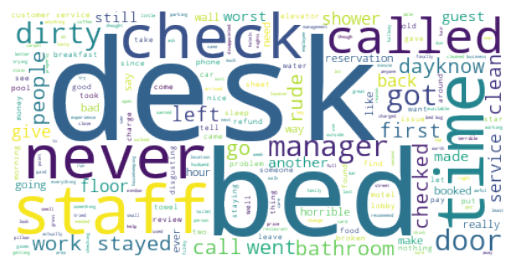

In [ ]:
text = ''
for i in df_rev_yelp_gm['review'][df_rev_yelp_gm['sentiment_text'] == 'Very Negative']:
    text += i + ' '

stop_words = stopwords.words('english')
stop_words += ['hotel','room','stay', 'one','s','asked','get','would','place','told','said',
               'rooms','front', 'night','even', 'u', 'could', 'also', 'us']

map_words = WordCloud(stopwords = stop_words, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(text)
plt.imshow(map_words, interpolation='bilinear')
plt.axis('off')
plt.show()


StatementMeta(, 46749dfa-a1e6-4dd7-b5e9-a4f4846acf47, 35, Finished, Available)

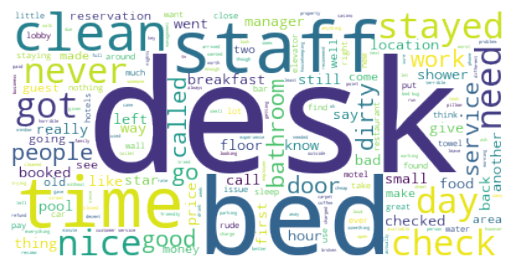

In [ ]:
text = ''
for i in df_rev_yelp_gm['review'][df_rev_yelp_gm['sentiment_text'] == 'Negative']:
    text += i + ' '

stop_words = stopwords.words('english')
stop_words += ['hotel','room','stay', 'one','s','asked','get','would','place','told','said',
               'rooms','front', 'night','even', 'u', 'could', 'also', 'us']

map_words = WordCloud(stopwords = stop_words, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(text)
plt.imshow(map_words, interpolation='bilinear')
plt.axis('off')
plt.show()

StatementMeta(, 46749dfa-a1e6-4dd7-b5e9-a4f4846acf47, 36, Finished, Available)

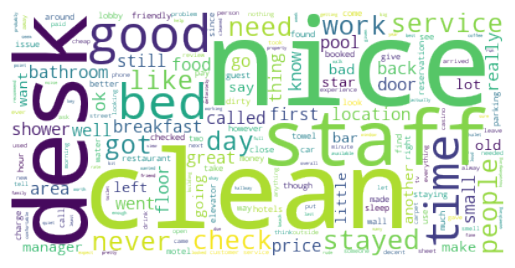

In [ ]:
text = ''
for i in df_rev_yelp_gm['review'][df_rev_yelp_gm['sentiment_text'] == 'Positive']:
    text += i + ' '

stop_words = stopwords.words('english')
stop_words += ['hotel','room','stay', 'one','s','asked','get','would','place','told','said',
               'rooms','front', 'night','even', 'u', 'could', 'also', 'us']

map_words = WordCloud(stopwords = stop_words, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(text)
plt.imshow(map_words, interpolation='bilinear')
plt.axis('off')
plt.show()

StatementMeta(, 46749dfa-a1e6-4dd7-b5e9-a4f4846acf47, 38, Finished, Available)

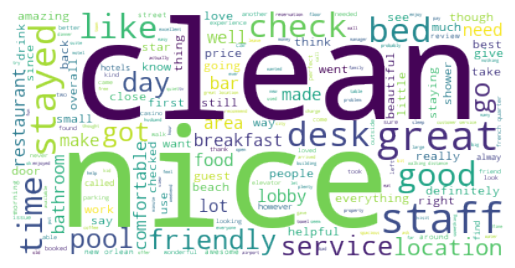

In [ ]:
text = ''
for i in df_rev_yelp_gm['review'][df_rev_yelp_gm['sentiment_text'] == 'Very Positive']:
    text += i + ' '

stop_words = stopwords.words('english')
stop_words += ['hotel','room','stay', 'one','s','asked','get','would','place','told','said',
               'rooms','front', 'night','even', 'u', 'could', 'also', 'us']

map_words = WordCloud(stopwords = stop_words, background_color="rgba(255, 255, 255, 0)", mode="RGBA").generate(text)
plt.imshow(map_words, interpolation='bilinear')
plt.axis('off')
plt.show()